<a href="https://colab.research.google.com/github/pabhijeet99/DS_Python_files/blob/main/Gas_Turbine(Neutral_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# **1 - Business Problem**
Predicting turbine energy yield (TEY) using ambient variables using Neural Networks

# **2 - Data collection and description**

In [10]:
df=pd.read_csv("/content/gas_turbines.csv")

In [11]:
data=df.copy()
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [13]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [14]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

# Outliers Check

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


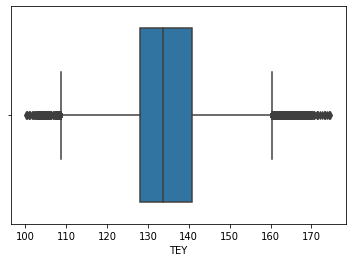

In [16]:
ax = sns.boxplot(data['TEY'])

# **Neutral Network Model**

In [17]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [18]:
scaled = StandardScaler()
X = scaled.fit_transform(X)
y = scaled.fit_transform(y)

In [19]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [20]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

<ipython-input-20-ae62adc6907d>:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.18 (0.15) MSE


In [21]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.2264748, -1.2309573, -1.2066326, ..., -1.127596 , -1.2038656,
       -1.2897578], dtype=float32)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [23]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [24]:
prediction

array([-1.5742319 ,  1.8895718 ,  1.0591794 , ...,  1.4285351 ,
        0.33794424, -0.3827768 ], dtype=float32)

In [25]:
X = data.drop(columns = ['TEY'], axis = 1) 
y = data.iloc[:,7]

In [26]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [27]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [29]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 2s - loss: 2788.9355 - mean_squared_error: 2788.9355 - val_loss: 168.9277 - val_mean_squared_error: 168.9277 - 2s/epoch - 5ms/step
Epoch 2/100
381/381 - 1s - loss: 96.6869 - mean_squared_error: 96.6869 - val_loss: 68.4864 - val_mean_squared_error: 68.4864 - 725ms/epoch - 2ms/step
Epoch 3/100
381/381 - 1s - loss: 42.0393 - mean_squared_error: 42.0393 - val_loss: 32.9957 - val_mean_squared_error: 32.9957 - 732ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 23.2808 - mean_squared_error: 23.2808 - val_loss: 19.6599 - val_mean_squared_error: 19.6599 - 696ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 13.2450 - mean_squared_error: 13.2450 - val_loss: 11.1035 - val_mean_squared_error: 11.1035 - 731ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 7.4120 - mean_squared_error: 7.4120 - val_loss: 6.7373 - val_mean_squared_error: 6.7373 - 714ms/epoch - 2ms/step
Epoch 7/100
381/381 - 1s - loss: 4.4683 - mean_squared_error: 4.4683 - val_loss: 4.0710 - val_mean_sq

In [30]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 1.5406 - mean_squared_error: 1.5406


# **Conclusion**

In [31]:
predictions = model.predict_on_batch(X_test_scaled)

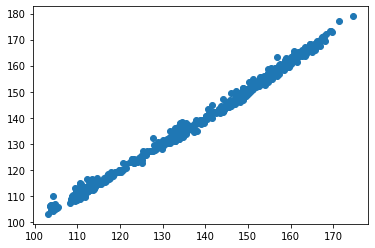

In [33]:
plt.scatter(y_test, predictions)

In [34]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.485489,0.018956
1,111.88,112.277115,0.354947
2,133.72,134.441650,0.539673
3,133.79,133.261200,0.395246
4,110.77,111.137077,0.331387
...,...,...,...
1499,132.85,133.826370,0.734942
1500,125.07,122.537018,2.025252
1501,160.95,162.711349,1.094346
1502,133.12,133.738831,0.464867
